In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, validation_curve, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_curve, roc_auc_score, classification_report, plot_roc_curve,roc_curve,auc
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC, LinearSVC
from sklearn import preprocessing
from sklearn import metrics

In [3]:
data=pd.read_csv("10%data.csv")
X = pd.DataFrame(data)
Y=data["status_time"].values
X = X.drop(columns = ["status_time", "id","investor_orig_time","REtype_SF_orig_time","REtype_PU_orig_time","REtype_CO_orig_time"])

In [4]:
X

,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,...,gdp_orig,gdp_dif,gdp_inc,uer_orig,uer_avg,uer_dif,uer_inc,hpi_avg,hpi_dif,hpi_inc
0,25,23,23,141,162400.00,78.451544,6.000,226.29,2.899137,4.7,...,2.987109,-0.087973,-0.029451,5.0,4.800000,-0.3,-0.060000,223.983333,4.38,0.019738
1,23,15,18,135,361000.00,69.039926,6.990,221.91,2.987109,5.0,...,3.370511,-0.383401,-0.113752,5.5,5.250000,-0.5,-0.090909,204.180000,60.64,0.376015
2,26,20,22,140,197820.00,68.119698,5.750,225.10,2.151365,4.7,...,3.278796,-1.127431,-0.343855,5.0,4.820000,-0.3,-0.060000,222.764000,25.89,0.129963
3,21,8,21,128,31359.33,32.613343,9.600,208.86,3.346929,5.2,...,3.346929,0.000000,0.000000,5.2,5.200000,0.0,0.000000,208.860000,82.94,0.658672
4,19,14,17,135,290195.46,76.423802,6.625,191.42,3.069483,5.5,...,4.126684,-1.057202,-0.256187,5.6,5.533333,-0.1,-0.017857,185.926667,35.65,0.228863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4167,38,26,28,127,162589.75,98.091720,13.625,158.77,-3.339549,9.5,...,1.229172,-4.568722,-3.716909,4.6,6.100000,4.9,1.065217,183.283636,-66.33,-0.294669
4168,46,26,28,147,57189.58,108.853227,7.925,155.61,1.175909,9.0,...,1.229172,-0.053263,-0.043333,4.6,7.521053,4.4,0.956522,172.104210,-69.49,-0.308707
4169,37,26,29,146,110860.86,130.184699,9.350,153.35,-4.146711,9.0,...,1.692969,-5.839680,-3.449373,4.5,5.888889,4.5,0.000000,181.964444,-71.75,-0.318747
4170,51,17,19,137,42843.56,89.770175,6.125,158.60,1.269044,7.8,...,3.069483,-1.800438,-0.586561,5.5,6.930303,2.3,0.418182,181.036061,-20.85,-0.116188


In [7]:
#Scale X Variables
scaler = preprocessing.StandardScaler().fit(X)
scaler.mean_
scaler.scale_
X = scaler.transform(X)

In [15]:
X_train, X_valid, Y_train, Y_valid =train_test_split(X, Y, train_size=0.8, random_state=7)

In [16]:
model=SVC(kernel="linear", gamma=1,C=1)
model.fit(X_train, Y_train)
Y_pred=model.predict(X_valid)

In [17]:
print(classification_report(Y_valid, Y_pred))
model.score(X_valid,Y_valid)

              precision    recall  f1-score   support

           0       0.73      0.67      0.70       290
           1       0.83      0.87      0.85       545

    accuracy                           0.80       835
   macro avg       0.78      0.77      0.77       835
weighted avg       0.80      0.80      0.80       835



0.7988023952095809

In [18]:
#See the Confusion Matrix of Linear
print(confusion_matrix(Y_valid, Y_pred))

[[194  96]
 [ 72 473]]


In [19]:
#Poly model
poly_model=SVC(kernel="poly", gamma=1)
poly_model.fit(X_train, Y_train)
Y_pred_poly=poly_model.predict(X_valid)
print(classification_report(Y_valid, Y_pred_poly))
poly_model.score(X_valid,Y_valid)

              precision    recall  f1-score   support

           0       0.60      0.57      0.58       290
           1       0.78      0.80      0.79       545

    accuracy                           0.72       835
   macro avg       0.69      0.68      0.68       835
weighted avg       0.71      0.72      0.72       835



0.7173652694610778

In [37]:
#rbf model
rbf_model=SVC(kernel="rbf", gamma=1)
rbf_model.fit(X_train, Y_train)
Y_pred_rbf=rbf_model.predict(X_valid)
print(classification_report(Y_valid, Y_pred_rbf))
rbf_model.score(X_valid,Y_valid)

              precision    recall  f1-score   support

           0       0.67      0.24      0.35       290
           1       0.70      0.94      0.80       545

    accuracy                           0.69       835
   macro avg       0.68      0.59      0.58       835
weighted avg       0.69      0.69      0.64       835



0.6946107784431138

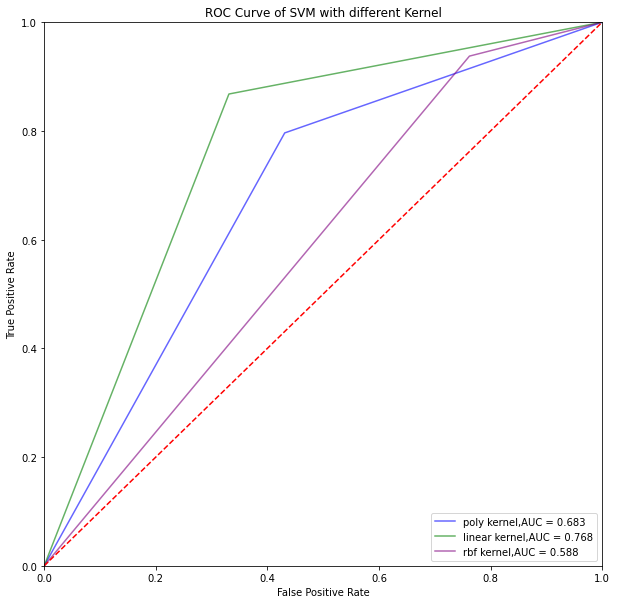

In [42]:
plt.figure(figsize=(10,10))
fpr, tpr, threshold = roc_curve(Y_valid, Y_pred_poly)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color="Blue",label =  'poly kernel,AUC = %0.3f' % roc_auc,alpha=0.6)

fpr, tpr, threshold = roc_curve(Y_valid, Y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color="Green",label =  'linear kernel,AUC = %0.3f' % roc_auc,alpha=0.6)

fpr, tpr, threshold = roc_curve(Y_valid, Y_pred_rbf)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color="Purple",label =  'rbf kernel,AUC = %0.3f' % roc_auc,alpha=0.6)
plt.legend(loc = 'lower right')
title='ROC Curve of SVM with different Kernel'
plt.title(title)
#Add the diagonal
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()